##Probabilidade e Amostragem

*Considerando a base de dados de populacao_brasileira.json responda as
questões abaixo (os dados são fictícios).*

Você é uma pesquisadora desenvolvendo uma análise sobre as
características da força de trabalho nos estados brasileiros. Responda as
perguntas abaixo:

In [ ]:
### para manipulação dos dados em python
import pandas as pd
import numpy as np

### para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
dados = pd.read_csv("/content/populacao_brasileira.csv.csv")

In [ ]:
dados.head() #1000 amostras

**1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.**

In [ ]:
# Calcular o total de pessoas na amostra
TP = len(dados)

# Calcular o número de pessoas fluentes em inglês no nível avançado
FE = len(dados[dados['nível de proficiência em inglês'] == 'Avançado'])

# Calcular a probabilidade de ser fluente em inglês
PFE = FE / TP

# Calcular a probabilidade complementar
CO = 1 - PFE

print("Probabilidade complementar de não ser fluente em inglês:", CO)

Probabilidade complementar de não ser fluente em inglês: 0.656


**2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?**

In [ ]:
# Filtrar as pessoas dos estados do Pará e de Alagoas
dados_para_alagoas = dados[(dados['estado'] == 'PA') | (dados['estado'] == 'AL')]

# Calcular o total de pessoas nos estados do Pará e de Alagoas
TP_Para_Alagoas = len(dados_para_alagoas)

# Filtrar as pessoas com renda igual ou superior a 5 mil reais
dados_5_mil_reais_ou_mais = dados_para_alagoas[dados_para_alagoas['renda'] >= 5000]

# Calcular o total de pessoas com renda igual ou superior a 5 mil reais nos estados do Pará e de Alagoas
TP_Para_Alagoas_5_ou_mais_mil_reais_renda = len(dados_5_mil_reais_ou_mais)

# Calcular a probabilidade de ter uma renda superior a 5 mil reais nos estados do Pará e de Alagoas
PF = TP_Para_Alagoas_5_ou_mais_mil_reais_renda / TP_Para_Alagoas

print("Probabilidade de ter renda superior a 5 mil reais em Alagoas ou Pará:", PF)

Probabilidade de ter renda superior a 5 mil reais em Alagoas ou Pará: 0.05063291139240506


**3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?**

In [ ]:
# Filtrar as pessoas que estão no estado do Amazonas
dados_amazonas = dados[dados['estado'] == 'AM']

# Calcular o total de pessoas no estado do Amazonas
P_Amazonas = len(dados_amazonas)

# Filtrar as pessoas com ensino superior completo e pós-graduação no estado do Amazonas
dados_superior_pos = dados_amazonas[(dados_amazonas['escolaridade'] == 'Superior') | (dados_amazonas['escolaridade'] == 'Pós-graduação')]

# Calcular o total de pessoas com ensino superior completo e pós-graduação no estado do Amazonas
P_Amazonas_Ensino_Superior_Completo_e_Pos_Graduacao = len(dados_superior_pos)

# Calcular a probabilidade de uma pessoa ter ensino superior completo e pós-graduação no estado do Amazonas
PEFETIVA = P_Amazonas_Ensino_Superior_Completo_e_Pos_Graduacao / P_Amazonas

# Calcular a probabilidade complementar
PCOMPLEMENTAR = 1 - P_Amazonas_Ensino_Superior_Completo_e_Pos_Graduacao / P_Amazonas

# Calcular a probabilidade de que a quinta pessoa que você conversar, que seja amazonense, tenha ensino superior completo
P1_P2_P3_P4_P5 = PCOMPLEMENTAR * PCOMPLEMENTAR * PCOMPLEMENTAR * PCOMPLEMENTAR * PEFETIVA

print("Probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas:", PEFETIVA)
print("Probabilidade de que a quinta pessoa que você conversar, que seja amazonense, tenha ensino superior completo:", P1_P2_P3_P4_P5)

Probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas: 0.5526315789473685
Probabilidade de que a quinta pessoa que você conversar, que seja amazonense, tenha ensino superior completo: 0.022135890467222828


**4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?**

In [ ]:
# Definir os limites das faixas salariais
faixas_salariais = [0, 1500, 3000, 4500, 6000]

# Rotular as faixas salariais
rotulos = ['Renda A', 'Renda B', 'Renda C', 'Renda D']

# Adicionar uma nova coluna ao dataframe que indica a faixa salarial de cada pessoa
dados['Faixa_salarial'] = pd.cut(dados['renda'], bins=faixas_salariais, labels=rotulos, right=False)

# Contar o número de pessoas em cada faixa salarial
contagem_por_faixa = dados['Faixa_salarial'].value_counts().sort_index()

print("Número de pessoas em cada faixa salarial:")
print(contagem_por_faixa)

# Calcular a densidade de probabilidade
densidade_probabilidade = contagem_por_faixa / len(dados)

print("\nFunção densidade de probabilidade:")
print(densidade_probabilidade)

Número de pessoas em cada faixa salarial:
Faixa_salarial
Renda A     55
Renda B    414
Renda C    442
Renda D     89
Name: count, dtype: int64

Função densidade de probabilidade:
Faixa_salarial
Renda A    0.055
Renda B    0.414
Renda C    0.442
Renda D    0.089
Name: count, dtype: float64


*Podemos analisar que a faixa salarial dos brasileiros se encontra entre 3000 e 4500*

**5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.**

Média da renda da amostra: 3082.5371800000003
Variância da renda da amostra: 992163.0719394477


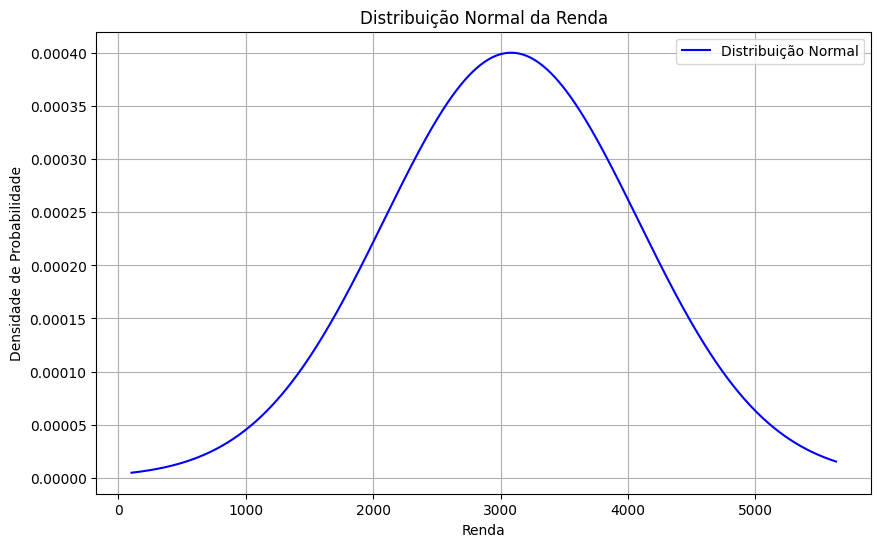

In [ ]:
# Calcular a média da renda da amostra
RENDA_MEDIA = dados['renda'].mean()

# Calcular a variância da renda da amostra
variancia = ((dados['renda'] - RENDA_MEDIA) ** 2).sum() / len(dados)

print("Média da renda da amostra:", RENDA_MEDIA)
print("Variância da renda da amostra:", variancia)

# Configuração para plotagem da distribuição normal
x = np.linspace(dados['renda'].min(), dados['renda'].max(), 1000)
pdf = norm.pdf(x, RENDA_MEDIA, np.sqrt(variancia))

# Plotar a distribuição normal
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribuição Normal', color='blue')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal da Renda')
plt.legend()
plt.grid(True)
plt.show()


**6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?**

In [ ]:
# ETAPA 1
# Filtrar por pessoas com pós-graduação
amostra_total = len(dados)  # Tamanho da amostra total
amostra_pos_graduacao = len(dados[dados['escolaridade'] == 'Pós-graduação'])  # Tamanho da amostra com pós-graduação
probabilidade_pos_graduacao = amostra_pos_graduacao / amostra_total  # Probabilidade de selecionar uma pessoa com pós-graduação

# ETAPA 2
# Novo tamanho da amostra (1 milhão)
n = 1000000
sucesso = 243000  # Número de pessoas com pós-graduação na nova amostra

# Calculando a probabilidade
probabilidade_243mil = probabilidade_pos_graduacao ** sucesso

print("Probabilidade de encontrarmos 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes:", probabilidade_243mil)


Probabilidade de encontrarmos 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes: 0.0


**7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.**

In [ ]:
# Calcular a função de densidade acumulada discreta para cada nível de escolaridade
escolaridades = dados['escolaridade'].unique()
densidade_acumulada = {}

# Inicializar o valor acumulado
valor_acumulado = 0

# Calcular a densidade acumulada para cada nível de escolaridade
for escolaridade in escolaridades:
    # Filtrar os dados para a escolaridade atual
    dados_escolaridade = dados[dados['escolaridade'] == escolaridade]
    # Calcular a densidade para essa escolaridade
    densidade = len(dados_escolaridade) / len(dados)
    # Adicionar à densidade acumulada
    valor_acumulado += densidade
    # Armazenar o valor acumulado para esta escolaridade
    densidade_acumulada[escolaridade] = valor_acumulado

print("Função de densidade acumulada discreta para cada nível de escolaridade:")
for escolaridade, acumulado in densidade_acumulada.items():
    print(escolaridade, "=", acumulado)


Função de densidade acumulada discreta para cada nível de escolaridade:
Fundamental = 0.266
Superior = 0.509
Médio = 0.747
Pós-graduação = 1.0


**8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?**

In [ ]:
# Calcular o número de pessoas com nível de inglês intermediário
intermediario = dados[dados['nível de proficiência em inglês'] == 'Intermediário']
p_intermediario = len(intermediario) / len(dados)

# Calcular a probabilidade complementar
p_complementar = 1 - p_intermediario

# Nível de confiança
confianca = 0.95

# Calcular o valor de Z dado o nível de confiança
Z = norm.ppf((1 + confianca) / 2)

# Tamanho da população (assumindo que seja o tamanho do conjunto de dados)
N = len(dados)

# Margem de erro amostral
margem_erro = Z * np.sqrt((p_complementar * p_intermediario) / N)

print("Margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário:", margem_erro)


Margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário: 0.029121068108804226


**9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?**

In [ ]:
# Calcular a média da renda da população brasileira
media_renda = dados['renda'].mean()

# Calcular a probabilidade de uma pessoa ter uma renda igual ou superior a 1000 reais acima da média
prob_uma_pessoa = 1 - norm.cdf(media_renda + 1000, loc=media_renda, scale=dados['renda'].std())

# Calcular a probabilidade de encontrar 60 pessoas com essa característica em uma amostra de 60 pessoas
prob_60_pessoas = prob_uma_pessoa ** 60

print("Probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média:", prob_60_pessoas)


Probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média: 7.770540736612784e-49


**10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?**

In [ ]:
# Filtrar as pessoas do Sudeste
sudeste = dados[(dados['estado'] == 'RJ') | (dados['estado'] == 'SP') | (dados['estado'] == 'MG') | (dados['estado'] == 'ES')]
P_SUDESTE = len(sudeste) / len(dados)

# Filtrar as pessoas do sexo masculino
homens = dados[dados['sexo'] == 'M']
P_HOMEM = len(homens) / len(dados)

# Filtrar as pessoas com ensino fundamental
fundamental = dados[dados['escolaridade'] == 'Fundamental']
P_ENSINO_FUNDAMENTAL = len(fundamental) / len(dados)

# Filtrar as pessoas com renda maior que 2 mil reais
renda_maior_2mil = dados[dados['renda'] > 2000]
P_RENDA_MAIOR_2_MIL = len(renda_maior_2mil) / len(dados)

# Calcular a probabilidade final
P_FINAL = P_SUDESTE * P_HOMEM * P_ENSINO_FUNDAMENTAL * P_RENDA_MAIOR_2_MIL

print("Probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês:", P_FINAL)


Probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês: 0.017414252856
